In [1]:
import tensorflow as tf
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/kate/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Tensorflow scripts have two halves. 
### 1. In the first half, you construct the graph in Python, like this:


In [2]:
# construct nodes
x = tf.Variable(3, name="in")
y = tf.Variable(5, name="multiplyer")
f = x*y


In [3]:
f

<tf.Tensor 'mul:0' shape=() dtype=int32>

### 2. Then you can start a session to run the graph.
### Tensorflow runs the graph using optimised C++ code

There are two ways to run the graph.
Here's the first way

In [4]:
sess = tf.Session() # initialise the session

In [5]:
sess.run(x.initializer) # initialise the variables within sess.run()
sess.run(y.initializer)

In [6]:
sess.run(f) # get f within sess.run()

15

Here's the second way, which avoids repeating sess.run()


Inside the `with` block, calling `x.initializer.run()` is equivalent to calling `tf.get_default_session().run(x.initializer)`.


i.e. it is equalivalent to:

`sess = tf.get_default_session()`

`sess.run(x.initializer)`


In [7]:
with tf.Session() as sess: # now we have a default session
    x.initializer.run()   # use the run() method of initialiser
    y.initializer.run()
    result=f.eval()        # use the eval() method of f

In [8]:
result

15

## Shortcuts

You don't need to initialize each variable individually: you can make an initializer node. It won't initialize all variables when it is defined, since it is a node in the graph, but it will do so when it is run in the graph.

In [9]:
init = tf.global_variables_initializer() # makes an init node


In [11]:
with tf.Session() as sess:
    init.run()
    result = f.eval()

In [12]:
result

15

## Let's try a model


In [13]:
from sklearn.datasets import fetch_california_housing


In [14]:
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data] # np.c_ concatenates as columns. So this adds a col of 1s to the data

In [16]:
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y) # this load of matrix multiplucation is the normal equation

In [22]:
with tf.Session() as sess:
    %timeit theta_value = theta.eval()

98.1 µs ± 6.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
print(theta_value)


[[-3.7185181e+01]
 [ 4.3633747e-01]
 [ 9.3952334e-03]
 [-1.0711310e-01]
 [ 6.4479220e-01]
 [-4.0338000e-06]
 [-3.7813708e-03]
 [-4.2348403e-01]
 [-4.3721911e-01]]


In [26]:
len(theta_value)

9

In [32]:
for thing in theta_value:
    print(thing)

[-37.18518]
[0.43633747]
[0.00939523]
[-0.1071131]
[0.6447922]
[-4.0338e-06]
[-0.00378137]
[-0.42348403]
[-0.4372191]


In [40]:
theta_vals = [j[0] for j in theta_value]



In [43]:
theta_vals

[-37.18518,
 0.43633747,
 0.009395233,
 -0.1071131,
 0.6447922,
 -4.0338e-06,
 -0.0037813708,
 -0.42348403,
 -0.4372191]

In [53]:
type(theta_vals)

list

In [56]:
vals = list(zip(theta_vals, list(range(len(theta_vals)))))

In [57]:
type(vals)

list

In [58]:
vals

[(-37.18518, 0),
 (0.43633747, 1),
 (0.009395233, 2),
 (-0.1071131, 3),
 (0.6447922, 4),
 (-4.0338e-06, 5),
 (-0.0037813708, 6),
 (-0.42348403, 7),
 (-0.4372191, 8)]

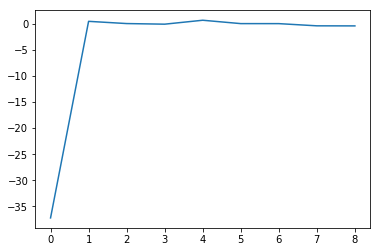

In [62]:
x = [i[1] for i in vals]
y = [i[0] for i in vals]
plt.plot(x, y)

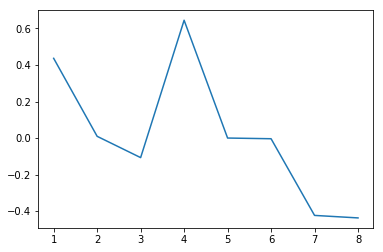

In [64]:
# ok, the first value (~-37) is throwing the scale off. let's remove it and see what happens

x = [i[1] for i in vals[1:]]
y = [i[0] for i in vals[1:]]
plt.plot(x, y)

But, actually you don't need to use the normal equation because Tensorflow will do all that for you.

In [73]:
X = tf.placeholder(tf.float32, shape=(None, n), name="X") # (None, n) are the number of rows (any) and cols (n) respectively
y = tf.placeholder(tf.float32, shape=(None, 1), name="y") # we want just one col, of any rows, for the target, y

batch_size = 100
n_batches = int

In [ ]:
def feed_batches(epoch, batch_index, batch_size):
    

## Introducing Tensorboard


In [69]:
from datetime import datetime

In [72]:
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir="tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)